# COLLABORATIVE-BASED FILTERING USING DEEP LEARNING

In [18]:
## importing necessaries libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Concatenate, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError

In [19]:
import tensorflow as tf

In [ ]:
pip install tensorboard

In [21]:
# load MovieLens dataset
ratings_data = pd.read_csv('ratings.csv')
movies_data = pd.read_csv("movies.csv")

In [22]:
# preprocess data
user_ids = ratings_data['userId'].unique()
item_ids = ratings_data['movieId'].unique()
num_users = len(user_ids)
num_items = len(item_ids)

In [23]:
# map user and item IDs to contiguous integers starting from 0
user_id_map = {old_id: new_id for new_id, old_id in enumerate(user_ids)}
item_id_map = {old_id: new_id for new_id, old_id in enumerate(item_ids)}

ratings_data['userId'] = ratings_data['userId'].map(user_id_map)
ratings_data['movieId'] = ratings_data['movieId'].map(item_id_map)

In [24]:
train_data, test_data = train_test_split(ratings_data, test_size=0.2, random_state=42)

In [25]:
train_data.shape

(80668, 4)

In [26]:
# build model
embedding_size = 100
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size)(user_input)
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_size)(item_input)

user_flatten = Flatten()(user_embedding)
item_flatten = Flatten()(item_embedding)

dot_product = Dot(axes=1)([user_flatten, item_flatten])

concatenated = Concatenate(axis=-1)([user_flatten, item_flatten])
dense_layer_1 = Dense(64, activation='relu')(concatenated)
output = Dense(1)(dense_layer_1)

In [27]:
model = Model(inputs=[user_input, item_input], outputs=output)

In [28]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=[MeanSquaredError()])

In [29]:
# train model
model.fit([train_data['userId'], train_data['movieId']], train_data['rating'],
          batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
1135/1135 [==============================] - 13s 10ms/step - loss: 1.4898 - mean_squared_error: 1.4898 - val_loss: 0.8364 - val_mean_squared_error: 0.8364
Epoch 2/10
1135/1135 [==============================] - 9s 8ms/step - loss: 0.7403 - mean_squared_error: 0.7403 - val_loss: 0.7950 - val_mean_squared_error: 0.7950
Epoch 3/10
1135/1135 [==============================] - 5s 4ms/step - loss: 0.6830 - mean_squared_error: 0.6830 - val_loss: 0.7685 - val_mean_squared_error: 0.7685
Epoch 4/10
1135/1135 [==============================] - 5s 4ms/step - loss: 0.6482 - mean_squared_error: 0.6482 - val_loss: 0.7600 - val_mean_squared_error: 0.7600
Epoch 5/10
1135/1135 [==============================] - 5s 5ms/step - loss: 0.6221 - mean_squared_error: 0.6221 - val_loss: 0.7610 - val_mean_squared_error: 0.7610
Epoch 6/10
1135/1135 [==============================] - 5s 4ms/step - loss: 0.5947 - mean_squared_error: 0.5947 - val_loss: 0.7806 - val_mean_squared_error: 0.7806
Epoch 7/10
113

In [30]:
model.summary()  ## printing the summary

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 1, 100)               61000     ['input_3[0][0]']             
                                                                                                  
 embedding_5 (Embedding)     (None, 1, 100)               972400    ['input_4[0][0]']             
                                                                                            

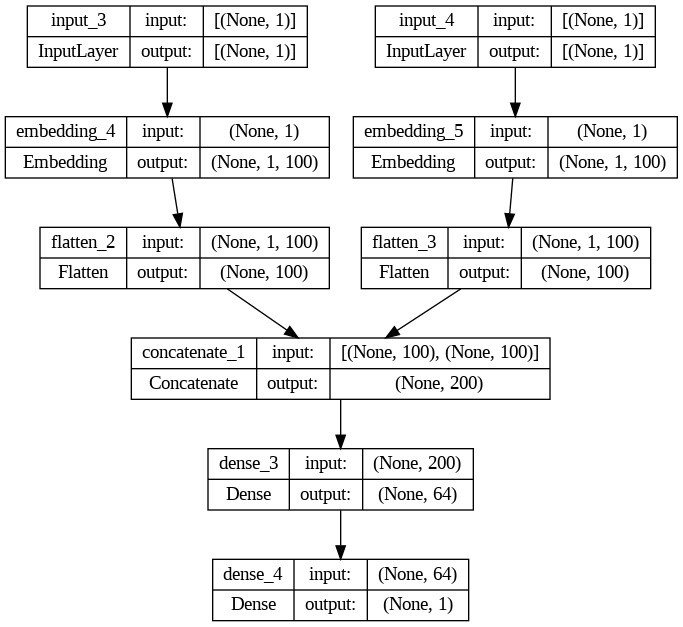

In [31]:
# generate the visual representation
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [32]:
# predict movies for a user
user_id = 1
user_ratings = np.array([user_id] * num_items)

In [33]:
print(user_ratings)

[1 1 1 ... 1 1 1]


In [34]:
movie_ids = np.arange(num_items)

In [35]:
print(movie_ids)

[   0    1    2 ... 9721 9722 9723]


In [36]:
predictions = model.predict([user_ratings, movie_ids])
predicted_ratings = predictions.flatten()

304/304 [==============================] - 1s 2ms/step


In [37]:
print(predicted_ratings.shape)

(9724,)


In [38]:
# get top recommended movies
top_movies_indices = np.argsort(predicted_ratings)[::-1][:5]
top_movies_ids = [item_ids[i] for i in top_movies_indices]

In [39]:
# map movie IDs back to their original IDs
top_movies_titles = movies_data[movies_data['movieId'].isin(top_movies_ids)]['title'].tolist()
print("Top recommended movies for user {}: ".format(user_id))
for i, title in enumerate(top_movies_titles):
    print(f"{i+1}. {title}")

Top recommended movies for user 1: 
1. Light Years (Gandahar) (1988)
2. Summer's Tale, A (Conte d'été) (1996)
3. Connections (1978)
4. Into the Abyss (2011)
5. Nasu: Summer in Andalusia (2003)
